In [100]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [101]:
def show_image_simple(img):
    """
    نمایش ساده یک تصویر
    
    Args:
        img: تصویر ورودی (NumPy array)
    """
    display(img)

In [102]:
def show_images(images, titles=None, cols=2, cmap=None, scale=4):
    """
    نمایش لیستی از تصاویر در یک گرید
    
    Args:
        images (list): لیستی از تصاویر (NumPy arrays)
        titles (list, optional): لیستی از عنوان‌ها
        cols (int): تعداد ستون‌ها (پیش‌فرض: 2)
        cmap (str, optional): نقشه رنگ برای تصاویر خاکستری (مثال: 'gray')
        scale (int): اندازه هر تصویر برای بزرگ‌نمایی
    """
    n_images = len(images)
    rows = (n_images + cols - 1) // cols
    plt.figure(figsize=(scale * cols, scale * rows))

    for i in range(n_images):
        plt.subplot(rows, cols, i + 1)
        img = images[i]

        # تبدیل BGR به RGB برای نمایش صحیح در matplotlib
        if img.ndim == 3 and img.shape[2] == 3:
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # انتخاب نقشه رنگ مناسب
        if cmap:
            plt.imshow(img, cmap=cmap)
        else:
            if img.ndim == 2:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)

        # اضافه کردن عنوان
        if titles and i < len(titles):
            plt.title(titles[i], fontsize=12)

        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [103]:
def imshow(title='', image=None, size=10):
    """
    نمایش یک تصویر با عنوان و اندازه قابل تنظیم
    
    Args:
        title (str): عنوان تصویر
        image (numpy.ndarray): تصویر ورودی
        size (int): اندازه نمایش
    """
    if image is None:
        print("تصویر ورودی نمی‌تواند None باشد")
        return
    
    W, H = image.shape[:2]
    aspect_ratio = H / W
    plt.figure(figsize=(aspect_ratio * size, size))
    
    # تبدیل BGR به RGB برای نمایش صحیح
    if len(image.shape) == 3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()



# ===============================
# بخش 1: خواندن و نمایش اولیه تصویر
# ===============================

In [104]:
# خواندن تصویر (مسیر را به تصویر مورد نظر خود تغییر دهید)
image_path = "Bird Speciees Dataset/BARN OWL/001.jpg"
image = cv.imread(image_path, cv.IMREAD_COLOR)

if image is None:
    print(f"خطا: نمی‌توان تصویر را از مسیر {image_path} خواند")
    # برای تست، یک تصویر نمونه ایجاد می‌کنیم
    image = np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8)

print(f"ابعاد تصویر: {image.shape}")
print(f"نوع داده: {image.dtype}")

ابعاد تصویر: (224, 224, 3)
نوع داده: uint8



# ===============================
# بخش 2: رسم اشکال هندسی روی تصویر
# ===============================


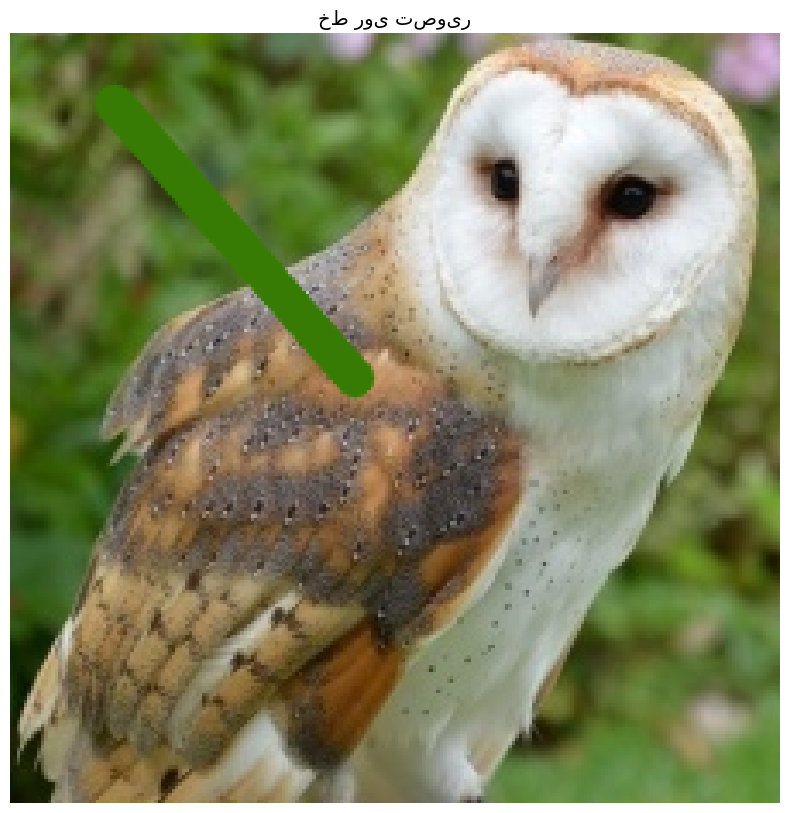

In [105]:
# رسم خط
line_image = image.copy()
cv.line(line_image, (30, 20), (100, 100), (4, 123, 55), thickness=10, lineType=cv.LINE_AA)
imshow("خط روی تصویر", line_image)

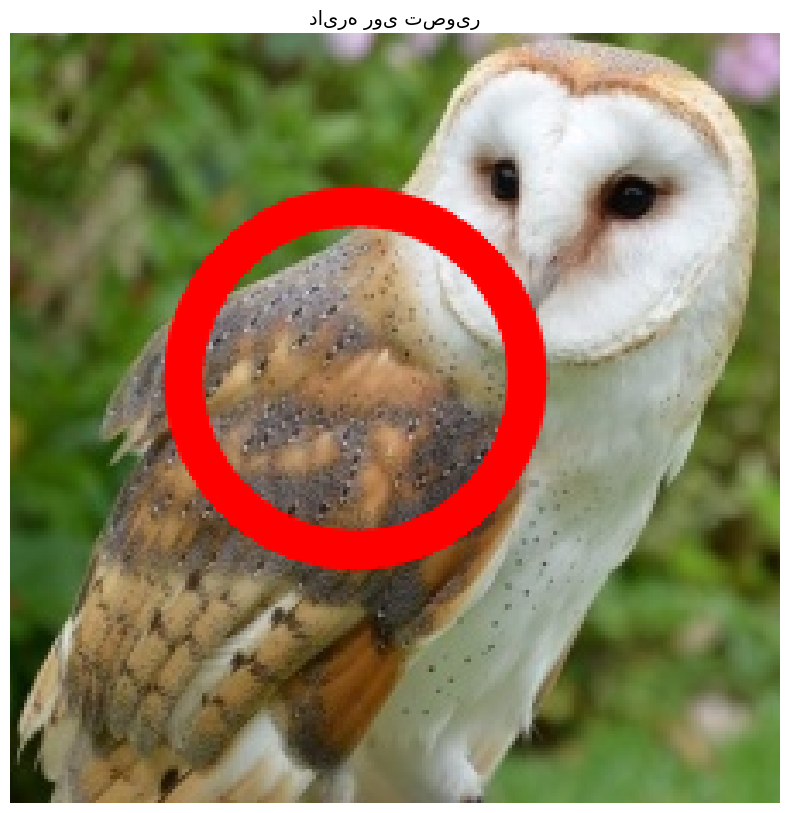

In [106]:
# رسم دایره
circle_image = image.copy()
cv.circle(circle_image, (100, 100), 50, (0, 0, 255), thickness=10, lineType=cv.LINE_AA)
imshow("دایره روی تصویر", circle_image)

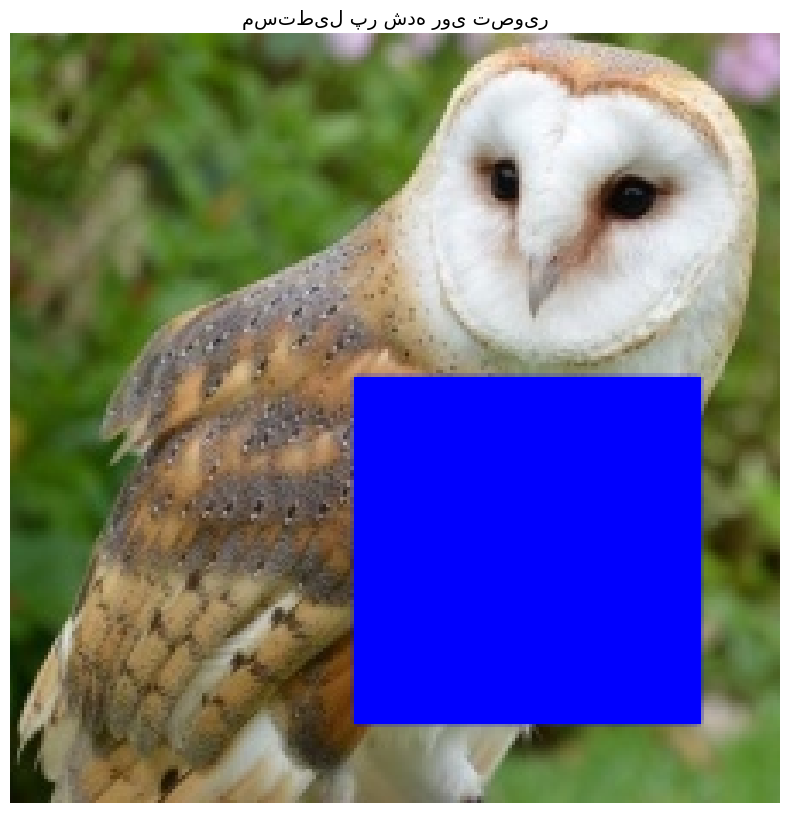

In [107]:
# رسم مستطیل (پر شده)
rectangle_image = image.copy()
cv.rectangle(rectangle_image, (100, 100), (200, 200), (255, 0, 0), thickness=cv.FILLED, lineType=cv.LINE_AA)
imshow("مستطیل پر شده روی تصویر", rectangle_image)

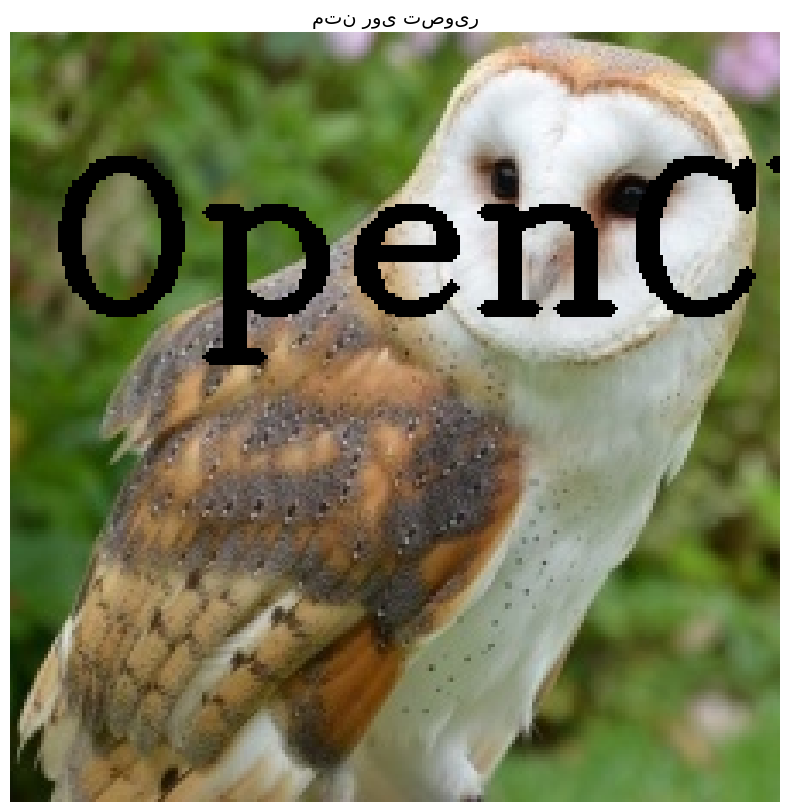

In [108]:
# اضافه کردن متن
text_image = image.copy()
cv.putText(text_image, "OpenCV Test", (10, 80), cv.FONT_HERSHEY_COMPLEX, 2, (0, 0, 0), thickness=3)
imshow("متن روی تصویر", text_image)

<h1>Split</h1>

# ===============================
# بخش 3: تقسیم کانال‌های رنگی
# ===============================

In [109]:
# جداسازی کانال‌های رنگی BGR
B, G, R = cv.split(image)

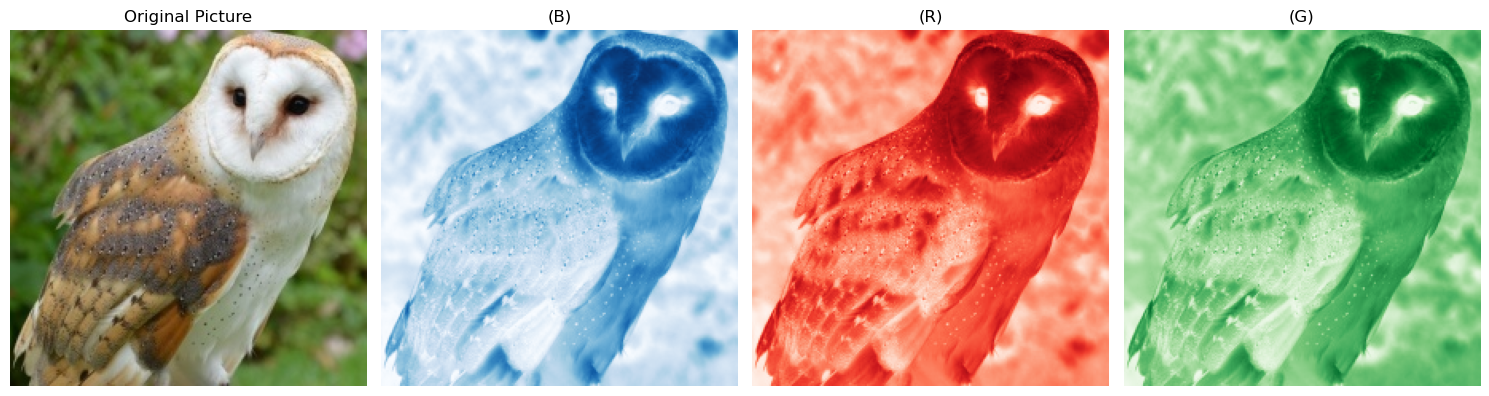

In [110]:
# نمایش کانال‌های رنگی
plt.figure(figsize=[15, 5])

plt.subplot(1, 4, 1)
plt.title("Original Picture")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("(B)")
plt.imshow(B, cmap='Blues')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("(G)")
plt.imshow(G, cmap='Greens')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("(R)")
plt.imshow(R, cmap='Reds')
plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Inverse</h1>


# ===============================
# بخش 4: معکوس کردن تصویر
# ===============================


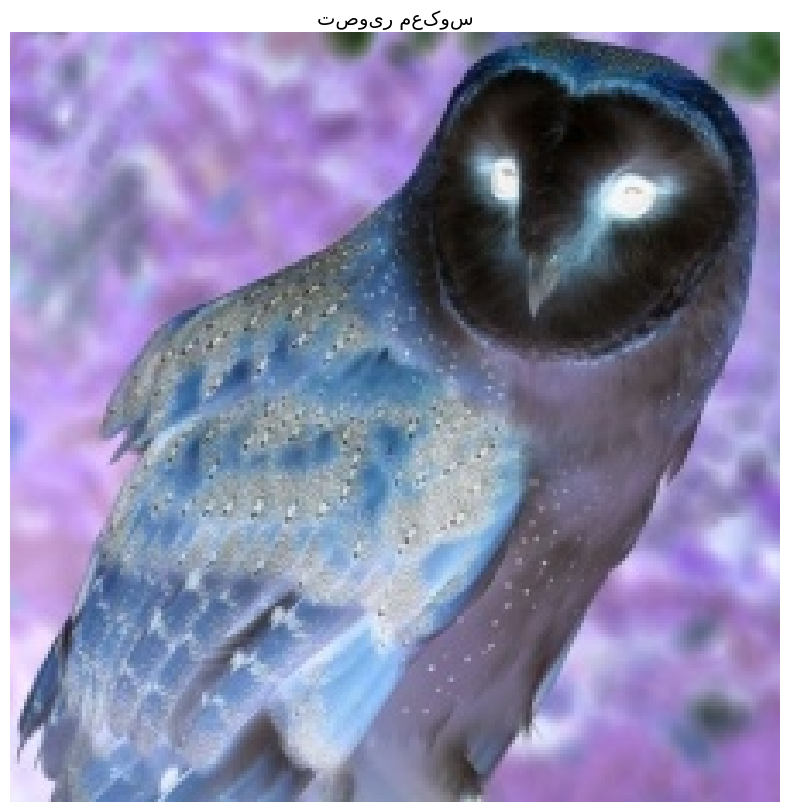

In [111]:
# معکوس کردن تصویر
inverse_image = 255 - image
imshow("تصویر معکوس", inverse_image)

<h1 rtl>بهبود کیفیت و ساختار کلی یک عکس که نور کم یا مشکلاتی دارد</h1>

# ===============================
# بخش 5: تنظیم روشنایی و کنتراست
# ===============================

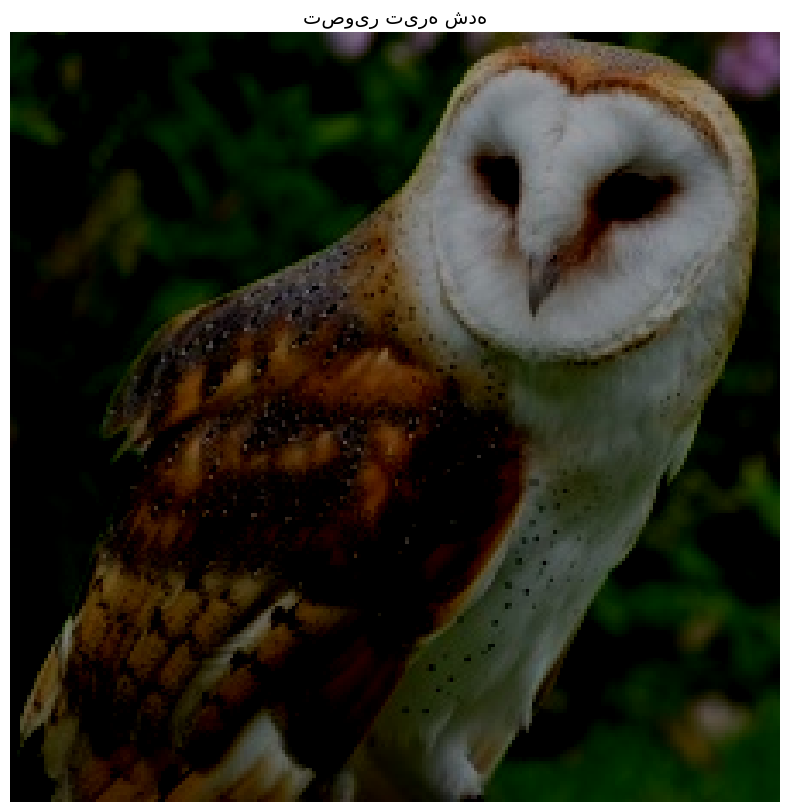

In [112]:
# کاهش روشنایی
brightness_reduction = 100
dark_image = cv.subtract(image, np.ones(image.shape, dtype=np.uint8) * brightness_reduction)
imshow("تصویر تیره شده", dark_image)

In [113]:
# محاسبه کنتراست اولیه
original_contrast = np.std(image)
print(f"کنتراست اولیه: {original_contrast:.2f}")

کنتراست اولیه: 56.52


In [114]:
# افزایش کنتراست - روش اول (ضرب)
image_float = image.astype(np.float32)
contrast_factor = 1.5
multiplied_image = image_float * contrast_factor
contrast_enhanced = np.clip(multiplied_image, 0, 255).astype(np.uint8)

enhanced_contrast = np.std(contrast_enhanced)
print(f"کنتراست بعد از افزایش: {enhanced_contrast:.2f}")

کنتراست بعد از افزایش: 69.81


In [115]:
# افزایش کنتراست - روش دوم (استفاده از convertScaleAbs)
alpha = 1.5  # ضریب کنتراست (1.0-3.0)
beta = 20    # مقدار روشنایی (0-100)
enhanced_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

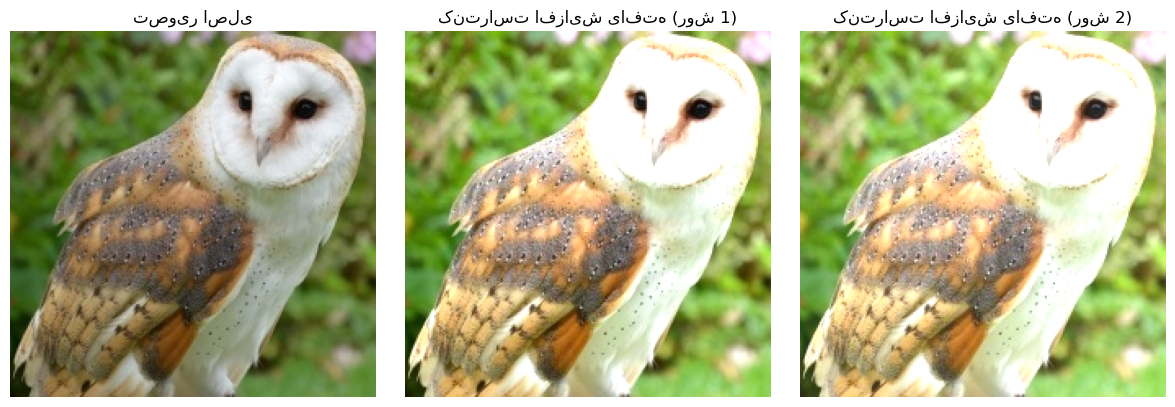

In [116]:
# نمایش مقایسه‌ای
show_images([image, contrast_enhanced, enhanced_image], 
           ["تصویر اصلی", "کنتراست افزایش یافته (روش 1)", "کنتراست افزایش یافته (روش 2)"], 
           cols=3, scale=4)


<h1>Cut an object from green screen</h1>

# ===============================
# بخش 6: حذف پس‌زمینه سبز (Green Screen)
# ===============================

In [117]:
def remove_green_background(image_path, output_path=None):
    """
    حذف پس‌زمینه سبز از تصویر
    
    Args:
        image_path (str): مسیر تصویر ورودی
        output_path (str, optional): مسیر ذخیره تصویر خروجی
    
    Returns:
        numpy.ndarray: تصویر با پس‌زمینه حذف شده
    """
    # خواندن تصویر
    img = cv.imread(image_path, cv.IMREAD_COLOR)
    if img is None:
        print(f"خطا: نمی‌توان تصویر را از {image_path} خواند")
        return None
    
    # تعریف محدوده رنگ سبز در فضای BGR
    lower_green = np.array([0, 100, 0])    # حد پایین سبز
    upper_green = np.array([100, 255, 100])  # حد بالای سبز
    
    # ایجاد ماسک برای پیکسل‌های سبز
    mask = cv.inRange(img, lower_green, upper_green)
    
    # نمایش ماسک
    imshow("ماسک پس‌زمینه سبز", mask)
    
    # حذف پس‌زمینه سبز (تبدیل به سیاه)
    result = img.copy()
    result[mask != 0] = [0, 0, 0]
    
    # نمایش نتیجه
    show_images([img, mask, result], 
               ["تصویر اصلی", "ماسک", "پس‌زمینه حذف شده"], 
               cols=3, scale=4)
    
    # ذخیره تصویر (در صورت نیاز)
    if output_path:
        cv.imwrite(output_path, result)
        print(f"تصویر در {output_path} ذخیره شد")
    
    return result

# استفاده از تابع حذف پس‌زمینه سبز
# rabbit_image = remove_green_background("Rabbit.png", "Rabbit_no_bg.png")


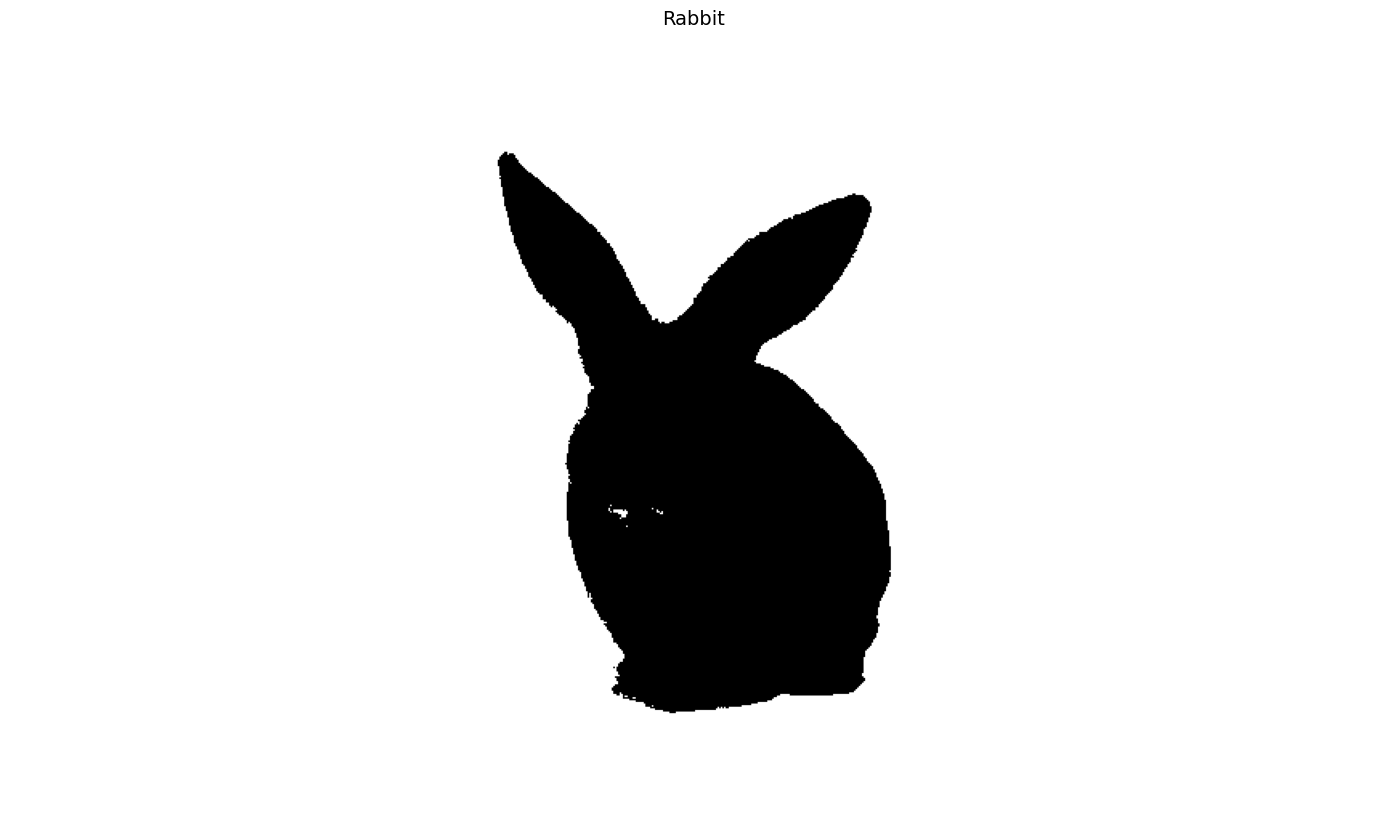

In [118]:
Rabbit = cv.imread("Rabbit.png",-1)
lower_bond = np.array([0,200,0])
upper_bond = np.array([150,255,150])

mask = cv.inRange(Rabbit, lower_bond, upper_bond)
imshow("Rabbit", mask)

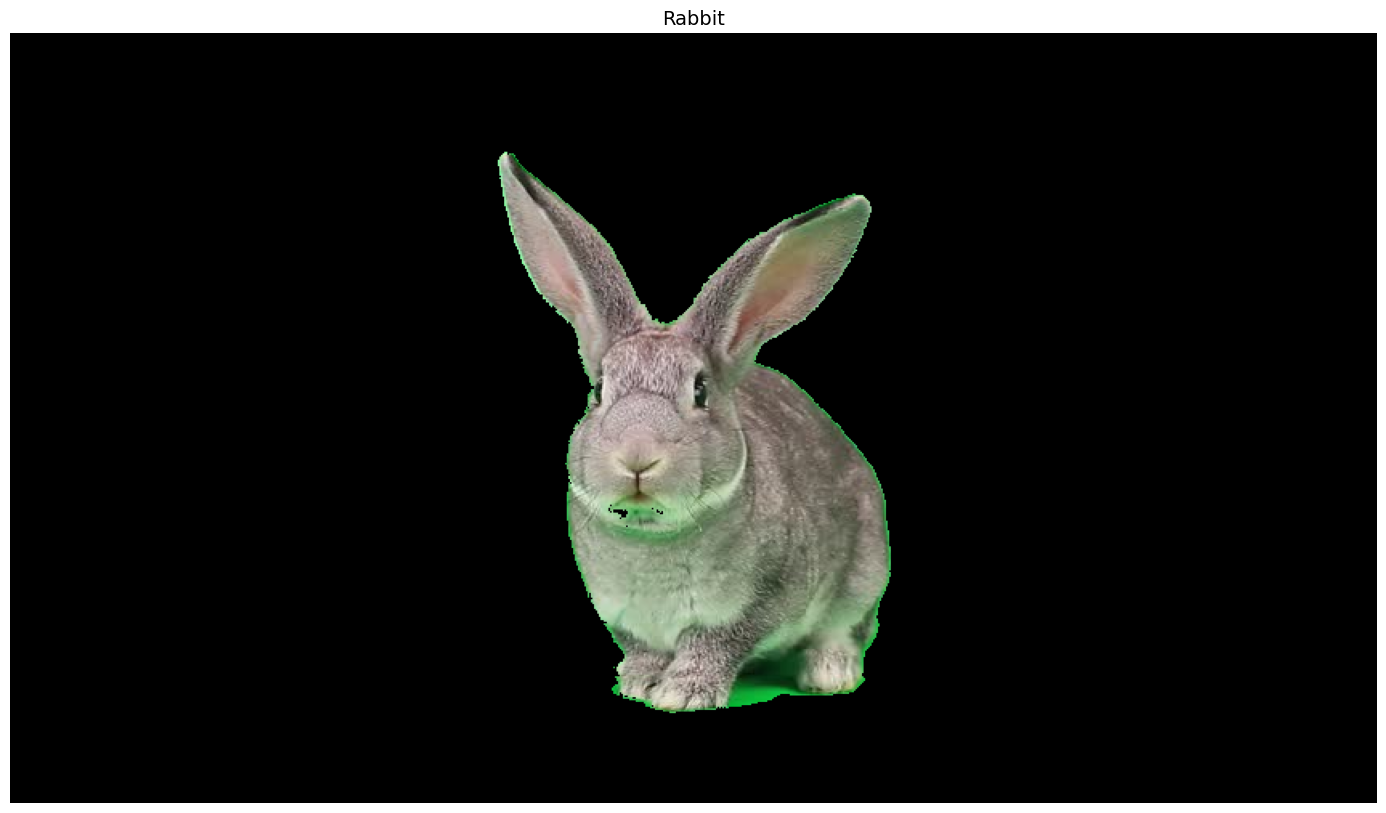

In [119]:
Rabbit[mask != 0] = (0,0,0)
imshow("Rabbit", Rabbit)


# ===============================
# بخش 7: توابع کمکی اضافی
# ===============================

In [120]:

def adjust_brightness_contrast(image, brightness=0, contrast=1.0):
    """
    تنظیم روشنایی و کنتراست تصویر
    
    Args:
        image (numpy.ndarray): تصویر ورودی
        brightness (int): مقدار روشنایی (-100 تا 100)
        contrast (float): ضریب کنتراست (0.5 تا 3.0)
    
    Returns:
        numpy.ndarray: تصویر تنظیم شده
    """
    return cv.convertScaleAbs(image, alpha=contrast, beta=brightness)

def create_collage(images, titles=None, rows=2, cols=2):
    """
    ایجاد کولاژ از چندین تصویر
    
    Args:
        images (list): لیست تصاویر
        titles (list, optional): لیست عناوین
        rows (int): تعداد ردیف‌ها
        cols (int): تعداد ستون‌ها
    """
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
    axes = axes.flatten() if rows * cols > 1 else [axes]
    
    for i, (ax, img) in enumerate(zip(axes, images)):
        if img.ndim == 3:
            ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        else:
            ax.imshow(img, cmap='gray')
        
        if titles and i < len(titles):
            ax.set_title(titles[i], fontsize=12)
        ax.axis('off')
    
    # مخفی کردن محورهای اضافی
    for j in range(len(images), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def get_image_info(image):
    """
    دریافت اطلاعات کامل تصویر
    
    Args:
        image (numpy.ndarray): تصویر ورودی
    """
    print(f"ابعاد تصویر: {image.shape}")
    print(f"نوع داده: {image.dtype}")
    print(f"حداقل مقدار پیکسل: {np.min(image)}")
    print(f"حداکثر مقدار پیکسل: {np.max(image)}")
    print(f"میانگین مقدار پیکسل: {np.mean(image):.2f}")
    print(f"انحراف معیار: {np.std(image):.2f}")
    
    if len(image.shape) == 3:
        print(f"تعداد کانال‌ها: {image.shape[2]}")
        print(f"میانگین هر کانال: B={np.mean(image[:,:,0]):.1f}, G={np.mean(image[:,:,1]):.1f}, R={np.mean(image[:,:,2]):.1f}")

# نمایش اطلاعات تصویر اصلی
print("\n=== اطلاعات تصویر اصلی ===")
get_image_info(image)

print("\n=== پردازش تصویر با OpenCV تکمیل شد ===")


=== اطلاعات تصویر اصلی ===
ابعاد تصویر: (224, 224, 3)
نوع داده: uint8
حداقل مقدار پیکسل: 0
حداکثر مقدار پیکسل: 255
میانگین مقدار پیکسل: 114.59
انحراف معیار: 56.52
تعداد کانال‌ها: 3
میانگین هر کانال: B=90.7, G=127.4, R=125.7

=== پردازش تصویر با OpenCV تکمیل شد ===


<h1>END OF SECOND DAY</h1>